# Class 10
## ML Techniques: Feature scaling

Another aspect of optimizing machine learning algorithms is to think about feature scaling. When we use multiple numeric features as inputs to a regression or classification algorithm, the computer just sees those values as numbers without context or units. What if we have the data that has one column corresponding to a driver's age and another column that corresponds to the vehicle gross weight. Those are very different sets of numbers. Without doing any other scaling or pre-processing, the machine learning algorithm may emphasize the vehicle weights more than the ages because they are larger numbers. We don't want that to happen.

The process of changing the data scale is called feature scaling and we'll look at two different types of feature scaling. If you want a good in-depth tutorial on how this works, I [recommend this tutorial](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html).

## Working with Different Data Types

We'll use a sample dataset from the [UCI archives.](http://archive.ics.uci.edu/ml/datasets/Wine) This dataset is looking at various characteristics of different wine samples and has classified the samples into one of three different classes (1,2, and 3). Let's import the data and take a look at it.


In [1]:
import pandas as pd

df = pd.read_csv('Class10_wine_data.csv')

df.head()

,Wine Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


There are a number of different features here. We'll focus on the first two: Alcohol which has units (percent/volumne) and Malic acid with units (g/l). Any machine learning algorithm that uses these features is going to treat them as if they were on the same scale. However, they aren't. So we need to re-scale them to unitless values in order to work with them.

Let's first look at the distribution of points in those columns.

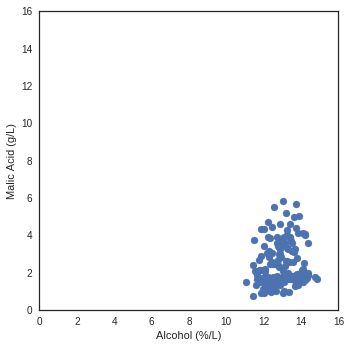

In [2]:
# Plot the first two feature columns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

#plt.figure(figsize=(8,6))

plt.scatter(df['Alcohol'], df['Malic acid'])
plt.xlabel('Alcohol (%/L)')
plt.ylabel('Malic Acid (g/L)')
plt.xlim(0,16)
plt.ylim(0,16)
plt.axes().set_aspect('equal')

### Standarization scaling

As we noted above, the goal is to turn these features into unitless parameters. That means we have to divide the feature by a quantity with the same units. There are two typical ways of doing this: we'll start with **standardization** or **Z-scale normalization**. We need to calculate the standard deviation of the feature, then divide the entire column by the standard deviation. Because the standard deviation has the same units as the feature itself, this takes care of the normalization.

We'll also do one more thing: we'll subtract the mean value of the distribution from each data point first. That way we end up with a distribution that is centered at zero. Of course there [is a library](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) that will do this for us. We need to fit the library on the data we want to scale, then use the `transform()` function to transform the input data based on the scaler. We can do both features at the same time: the scaler keeps track of them individually.

In [3]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scaler.transform(df[['Alcohol', 'Malic acid']])

print('Mean before standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df['Alcohol'].mean(), df['Malic acid'].mean()))

print('\nMean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))

print('\nStandard deviation before standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df['Alcohol'].std(), df['Malic acid'].std()))

print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))


Mean before standardization:
Alcohol=13.00, Malic acid=2.34

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation before standardization:
Alcohol=0.81, Malic acid=1.12

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


We've accomplished what we set out to do: the new means are close to zero and the standard deviations are 1. Let's see how it changed the shape of the distributions.

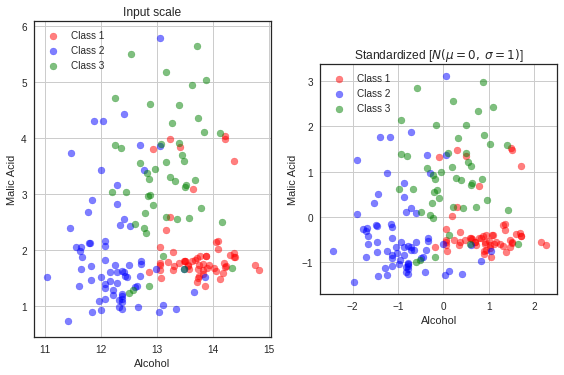

In [4]:
fig, ax = plt.subplots(1,2)

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, df_std),
               ('Input scale',
                'Standardized [$N  (\mu=0, \; \sigma=1)$]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Wine Class'].values == i, 0],
                  d[df['Wine Class'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
        ax[a].set_aspect('equal')
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()
plt.tight_layout()

It looks like we've re-scaled the data without changing the basic shape or the relationships between the points. That's good. The standardized data can now be used as inputs for the machine learning algorithms.

### Min-Max Scaling

One of the things we didn't mention before was that the standardization scaling only really works if we have enough data to get a good standard deviation and if the data are normally distributed (i.e. they look like a bell-shaped curve). IF these things don't apply, then standardization may not be the best thing to do.

There is another way we could scale the data: we could figure out the "distance" between the maximum and the minimum and then scale the data based on this "distance". Of course we should also subtract off the minimum point. The net result is that now the entire dataset lies between 0 and 1. Let's do this and see how it looks.

In [5]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scaler.transform(df[['Alcohol', 'Malic acid']])

print('Mean before min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df['Alcohol'].mean(), df['Malic acid'].mean()))

print('\nMean after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].mean(), df_minmax[:,1].mean()))

print('\nStandard deviation before min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df['Alcohol'].std(), df['Malic acid'].std()))

print('\nStandard deviation after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].std(), df_minmax[:,1].std()))

Mean before min-max scaling:
Alcohol=13.00, Malic acid=2.34

Mean after min-max scaling:
Alcohol=0.52, Malic acid=0.32

Standard deviation before min-max scaling:
Alcohol=0.81, Malic acid=1.12

Standard deviation after min-max scaling:
Alcohol=0.21, Malic acid=0.22


In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=23)

minmax_scaler = MinMaxScaler().fit(train[['Alcohol', 'Malic acid']])
train_features = minmax_scaler.transform(train[['Alcohol', 'Malic acid']])

In [7]:
train_features[0:2]

array([[ 0.34473684,  0.33794466],
       [ 0.16578947,  0.22529644]])

In [8]:
test[['Alcohol' ,'Malic acid']].head(2)

,Alcohol,Malic acid
162,12.85,3.27
30,13.73,1.50


In [9]:
test_features = minmax_scaler.transform(test[['Alcohol', 'Malic acid']])
test_features[0:2]

array([[ 0.47894737,  0.5       ],
       [ 0.71052632,  0.15019763]])

As you can see, we've really shifted things around. The means are not very pretty (because the dataset has been shrunk to fit between 0 and 1). Additionally the standard deviation has changed and isn't very pretty, either. Let's plot it to see if the shape has changed.

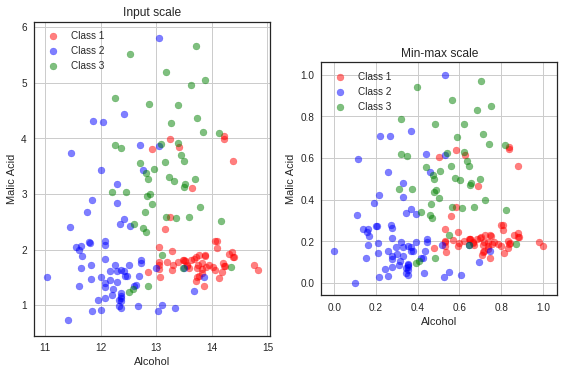

In [10]:
fig, ax = plt.subplots(1,2)

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, df_minmax),
               ('Input scale',
                'Min-max scale')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Wine Class'].values == i, 0],
                  d[df['Wine Class'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
        ax[a].set_aspect('equal')
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()
plt.tight_layout()

Although it looks like we've squished the dataset, the basic relationships between the points look the same - the overall shape is pretty close. 

Whether you use the standardization or the min-max scaling will depend on your dataset and your machine learning algorithm. I recommend exploring both to see which performs better for your data.

## In-class Activity

There are more features in the wine dataset. Run through the exercise of normalizing a couple of more features and plot them to make sure that you did it right. Finally, try running a classifier algorithm on the data both with and without normalization. How does the outcome change (if at all)?

## Homework

Test feature normalization on your project data. Does it change the outcome of your predictions? Document your results.